# Goal
This notebook contains a few algorithms in the course intro to computer vision and their implementations in python
## list of algorithms
1. 
## list of libraries and frameworks needed
the libraries used
- numpy
- pytorch
- matplotlib
- and some more...
- TBD

# Shannons sampling theorem


## the sampling theorem
The sampling theorem state that  

---
let $f(x)$ be a continous function. We will assume that the 'most high frequency of $f(x)$ is $\omega$'  

Then $f(x)$ can be recovered from each sample in frequency higher than $2\omega$


The `most high frequency` of $f(x)$ came from the fourier series of f. 

Let $F(u) = \int_{x=-\infty}^{\infty} {f(x)e^{-2\pi ux}dx}$ be the fourier transform of $f(x)$

By the properties of fourier transform and fourier series we know, that each function $f(x)$ can be described as a sum of cosin and sins with some frequencies


---

The following link may help
https://www.youtube.com/watch?v=FcXZ28BX-xE



### question from exam 2013

1.1	LET F(X) BE A FUNCTION. HOW CAN IT BE RESAMPLE?

For simplicity, we will assume we can apply on f(x) the continuous fourier transform. If we can not, all the reconstruction process is "invalid. We know that f(x) is composed from some sin() and cos() signals  with different frequencies (Fourier series).  
The highest (u) with $ F(u)\ne 0 $ when F is the fourier transform of f, is the hihest frequency appears in the fourier series of f.  
If F is with `finite support` (i.e $\exists_{B} \forall_{|u|>B}(F(u)=0)$) it can be recovered in the lowest sampling frequency of 2B.

This is a lower bound in some cases, and in some cases the function can be recovered in even lower frequency. however, If the sampling frequency is `uniform`, the Shannon's bound is mandatory




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cmath

def DFT2D(image):
    data = np.asarray(image)
    M, N = image.size # (img x, img y)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  data[m,n,1] * e
            dft2d[k,l] = sum_matrix
    return dft2d
# this code is not relly efficient since running in for loops and not with torch operations
img = PIL.Image.open("/home/azureuser/cloudfiles/code/Users/209056712/Intro_To_CV_finals/new_bnw.jpg")
plt.imshow(img)
img2 = img.resize((50,50))
plt.imshow(img2)
dft = DFT2D(img2)
plt.imshow(dft.real)
# pass image through a low pass filter

# Apply low pass filter on an image


Apply gaussian blur to an image centered in the center of the image

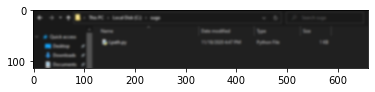

In [1]:
# we will use PIL for that
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
image = Image.open(r'/home/azureuser/cloudfiles/code/Users/209056712/IntroToCvFinals/some_image.png')
image_filter = image.filter(ImageFilter.GaussianBlur)
plt.imshow(image)
plt.imshow(image_filter)


In [8]:
import torch.fft
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open(r'new_bnw.jpg')
img = img.convert(mode='L')
img = np.array(img)
img = torch.from_numpy(img)
print(img.shape)  # (512, 512)

fft_img = torch.fft.fft(img)
print(fft_img)  # torch.Size([512, 512])
# convert torch to an image
torchvision.transforms.functional.to_pil_image(pic=fft_img,mode='L')


torch.Size([2832, 4256])
tensor([[153396.0000+0.0000j, -25890.1953-3355.9980j,
           5932.5947-10229.9375j,  ...,
         -19528.1523-9555.6582j,   5932.5947+10229.9375j,
         -25890.1953+3355.9980j],
        [153994.0000+0.0000j, -25437.0117-4117.2910j,
           5530.1616-10598.5117j,  ...,
         -19414.6016-9155.8867j,   5530.1616+10598.5117j,
         -25437.0117+4117.2910j],
        [152802.0000+0.0000j, -25206.6328-4314.8037j,
           4979.6367-9898.8037j,  ...,
         -19285.7266-9880.0195j,   4979.6367+9898.8037j,
         -25206.6328+4314.8037j],
        ...,
        [ 36369.0000+0.0000j, -13652.7617-1162.3975j,
           8174.8359+1343.2800j,  ...,
           4718.9814+1418.7037j,   8174.8359-1343.2800j,
         -13652.7617+1162.3975j],
        [ 34409.0000+0.0000j, -12182.8145-1496.2539j,
           6997.1436+1092.4060j,  ...,
           5341.0122+1102.9846j,   6997.1436-1092.4060j,
         -12182.8145+1496.2539j],
        [ 33543.0000+0.0000j, -11013.3

ValueError: Incorrect mode (L) supplied for input type <class 'numpy.dtype'>. Should be None

# Apply Homography on an image
One of the important course concepts.
we will try to give illustration about the process
